In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 6)

The dataset we are using for the final project contains the registered evictions performed in New York City from 2017 until today. The motivation behind the decision to analyze evictions lies in our excitement to dive into social phenonemena and explain or illustrate their chronological development and their dependence on other factors. In our case, examining the reported evictions in a large-scale city as that of New York, could enlighten our knowledge on other relevant social matters such as the distribution of the economic wealth, the poverty levels of the population and the fluctuation in rent prices over the years. The decision on selecting the specific dataset is due to the fact that it can be inextricably linked and give an overview of the latent economic situation in a metropolitan area and give indicates for future analysis. Our goal is to give the end user the opportunity to explore these correlations and get a better understanding on the level of dependence of the attributes through interactive plots. The dataset can be found in the [New York opendata website.](https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4)

In [2]:
df = pd.read_csv('Evictions.csv')
df.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,48174/18,349487,1238 BOYNTON AVENUE,1R,03/08/2019,Thomas,Bia,Residential,BRONX,10472,Not an Ejectment,Possession,40.829759,-73.878482,9.0,18.0,54.0,2025234.0,2.037740e+09,West Farms-Bronx River
1,B35706/18,108013,3235 GRAND CONCOURSE,6C,10/03/2018,Darlene,Barone,Residential,BRONX,10468,Not an Ejectment,Possession,40.877488,-73.885258,7.0,11.0,411.0,2017667.0,2.033230e+09,Bedford Park-Fordham North
2,55095/17,10840,640 E 86TH STREET,NaN,07/25/2017,Edward,Guida,Residential,BROOKLYN,11236,Not an Ejectment,Possession,40.640733,-73.911547,18.0,46.0,958.0,3223963.0,3.079900e+09,Canarsie
3,Q72651/16,75106,148-41 236 STREET,NaN,03/31/2017,Ileana,Rivera,Residential,QUEENS,11422,Not an Ejectment,Possession,40.653782,-73.747053,13.0,31.0,694.0,4443919.0,4.137360e+09,Springfield Gardens South-Brookville
4,64094/17,11817,38-32 29TH STREET,1,08/16/2017,Edward,Guida,Residential,QUEENS,11101,Not an Ejectment,Possession,40.754198,-73.933916,1.0,26.0,31.0,4004669.0,4.003850e+09,Queensbridge-Ravenswood-Long Island City


The dataset spans over 70.000 records of evictions that have been performed since 2017. Out of the total 20 features, a first skim of the dataset reveals that the most suitable attributes for the analysis that could be extracted is the date of the eviction, the geographical location, the postalcode, the borough, the category and the mashal who performed it. 

Concerning data cleaning and preprocessing, it is worth mentioning that the dataset was inspected for missing values and it was decided to exclude the recorded evictions from which their geographical location (longitude, latitude) or the Neighborhood Tabulation Area (NTA) values were missing.

In [3]:
df = df.dropna(subset=['NTA'])
df = df.drop(columns=['Eviction Apartment Number','BIN','BBL'])
df.isnull().sum()

Court Index Number           0
Docket Number                0
Eviction Address             0
Executed Date                0
Marshal First Name           0
Marshal Last Name            0
Residential/Commercial       0
BOROUGH                      0
Eviction Postcode            0
Ejectment                    0
Eviction/Legal Possession    0
Latitude                     0
Longitude                    0
Community Board              0
Council District             0
Census Tract                 0
NTA                          0
dtype: int64

In [4]:
df['Executed Date'] = pd.to_datetime(df['Executed Date'])
df['year'] = df['Executed Date'].dt.year

In [5]:
df.head()

,Court Index Number,Docket Number,Eviction Address,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,year
0,48174/18,349487,1238 BOYNTON AVENUE,2019-03-08,Thomas,Bia,Residential,BRONX,10472,Not an Ejectment,Possession,40.829759,-73.878482,9.0,18.0,54.0,West Farms-Bronx River,2019
1,B35706/18,108013,3235 GRAND CONCOURSE,2018-10-03,Darlene,Barone,Residential,BRONX,10468,Not an Ejectment,Possession,40.877488,-73.885258,7.0,11.0,411.0,Bedford Park-Fordham North,2018
2,55095/17,10840,640 E 86TH STREET,2017-07-25,Edward,Guida,Residential,BROOKLYN,11236,Not an Ejectment,Possession,40.640733,-73.911547,18.0,46.0,958.0,Canarsie,2017
3,Q72651/16,75106,148-41 236 STREET,2017-03-31,Ileana,Rivera,Residential,QUEENS,11422,Not an Ejectment,Possession,40.653782,-73.747053,13.0,31.0,694.0,Springfield Gardens South-Brookville,2017
4,64094/17,11817,38-32 29TH STREET,2017-08-16,Edward,Guida,Residential,QUEENS,11101,Not an Ejectment,Possession,40.754198,-73.933916,1.0,26.0,31.0,Queensbridge-Ravenswood-Long Island City,2017


In [6]:
# REMOVE LONGITUDE AND LATITUDE OUTSIDE GREATER NEW YORK AREA
minlong = -79.7624
minlat =  40.4772
maxlong = -71.7517
maxlat =  45.0153

masklong = ((df['Longitude'] >= minlong) & (df['Longitude'] <= maxlong)) & ((df['Longitude'] >= minlong) & (df['Longitude'] <= maxlong))
df_ = (df.loc[masklong])


masklat = ((df_['Latitude'] >= minlat) & (df_['Latitude'] <= maxlat)) & ((df_['Latitude'] >= minlat) & (df_['Latitude'] <= maxlat))
df= (df_.loc[masklat])

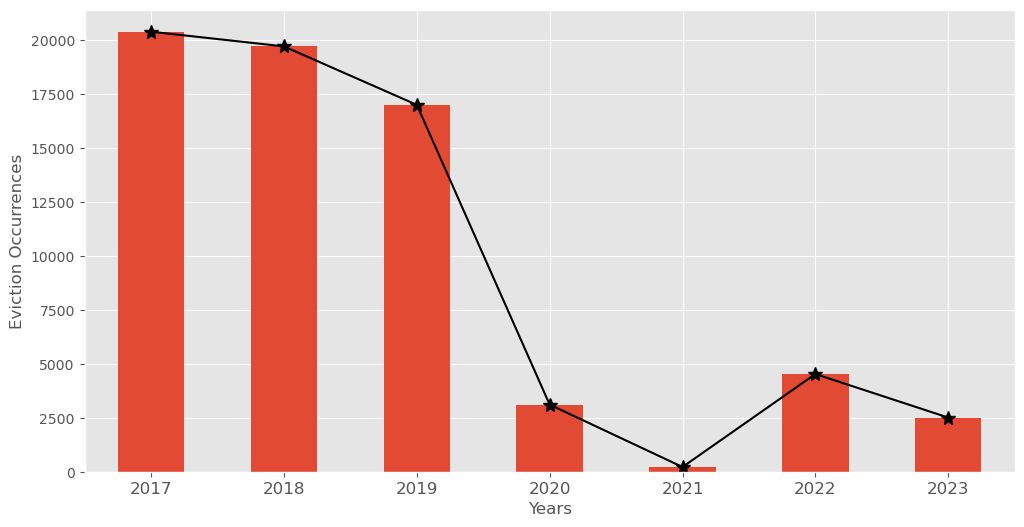

In [7]:
x_axiss = [df.groupby(['year'])['year'].count().iloc[0], df.groupby(['year'])['year'].count().iloc[1], df.groupby(['year'])['year'].count().iloc[2], df.groupby(['year'])['year'].count().iloc[3], df.groupby(['year'])['year'].count().iloc[4], df.groupby(['year'])['year'].count().iloc[5], df.groupby(['year'])['year'].count().iloc[6]]
df.groupby(['year'])['year'].count().plot.bar(x='year', y='years')
plt.plot(x_axiss, marker='*', color='black', ms=10)
plt.xlabel('Years')
plt.ylabel('Eviction Occurrences')
plt.xticks(rotation=0, size=12)
plt.show()

The first plotted histogram depicts the distribution of the number of evictions in the examined period and with a first glimpse, it can easily become evident that COVID-19 has affected dramatically the occurrences. Based on this, a targeted research on articles concerning the Covid period with the performed evictions followed, only to find out, that it was a governmental decision to freeze planned evictions for tenants who had financial problems during that period.

In [8]:
df["Full Name"] = df['Marshal First Name']+" "+ df["Marshal Last Name"]

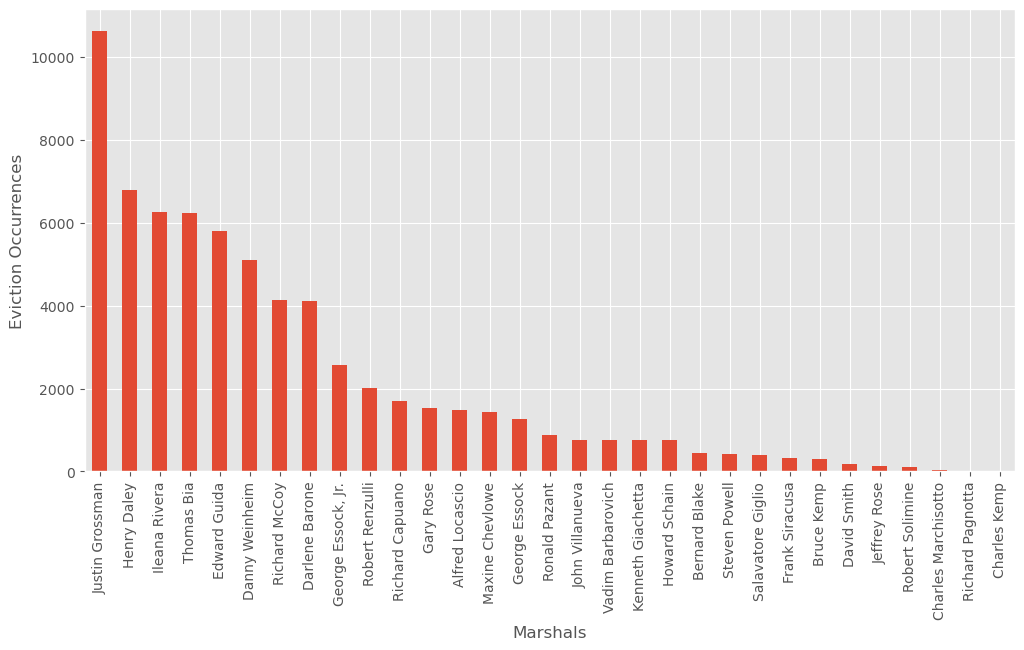

In [9]:
df.groupby("Full Name")['Full Name'].count().sort_values( ascending=False).plot.bar(y='marshals', x='Full Name')
plt.xlabel('Marshals')
plt.ylabel('Eviction Occurrences')
plt.show()

Another interesting information that we derived from the initial dataset is the list of marshals who performed the evictions over the years. The information someone could obtain from this plot is that there is a relatively small number of officers specializing in evictions for such a big city as New York while it is even more interesting to see that a specific police marshal has been in charge for performing most of them.

In [11]:
df_count = df.groupby(['Full Name','year'])['year'].count().reset_index(name='counts')

In [12]:
df_count

,Full Name,year,counts
0,Alfred Locascio,2017,449
1,Alfred Locascio,2018,465
2,Alfred Locascio,2019,334
3,Alfred Locascio,2020,73
4,Alfred Locascio,2021,6
...,...,...,...
154,Thomas Bia,2022,352
155,Thomas Bia,2023,240
156,Vadim Barbarovich,2017,185
157,Vadim Barbarovich,2018,314


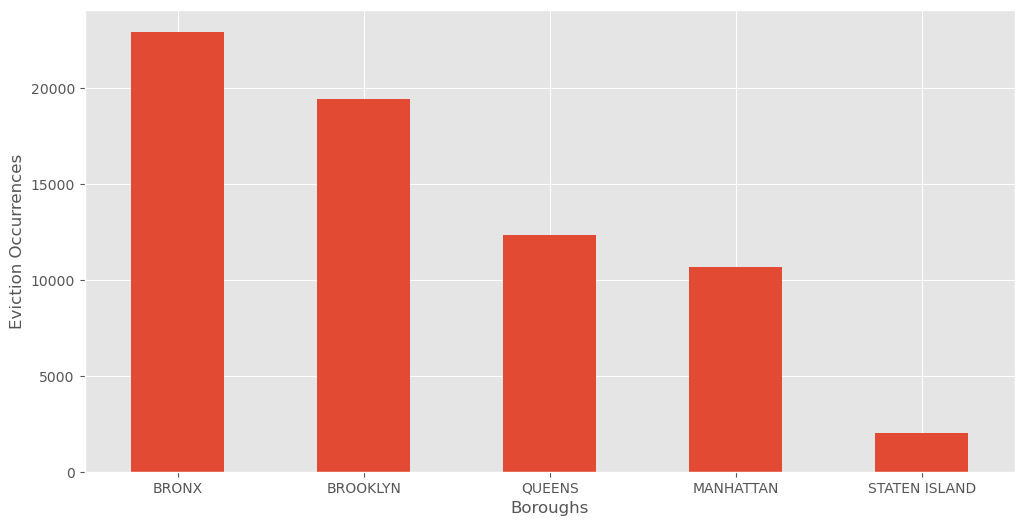

In [13]:
df.groupby("BOROUGH")['BOROUGH'].count().sort_values(ascending=False).plot.bar(y='count_BOROUGH', x='BOROUGH')
plt.xlabel('Boroughs')
plt.ylabel('Eviction Occurrences')
plt.xticks(rotation=0)
plt.show()

At this point, a distribution of the evictions over the boroughs of NEW YORK was plotted in order to get a first view on the hotspot areas. The borough plot reveals that Bronx stands out with the highest number of recorded evictions followed by BROOKLYN. This information would later be enhanced by plotting the Neighborhood Tabulation Areas (NTAs) in an interactive geo map to investigate further which areas could be considered as eviction "hotspots". Even more, we considered appropriate to search for the rental prices and the annual income in the distinct NTA in order to better interpret and elaborate on our analysis.

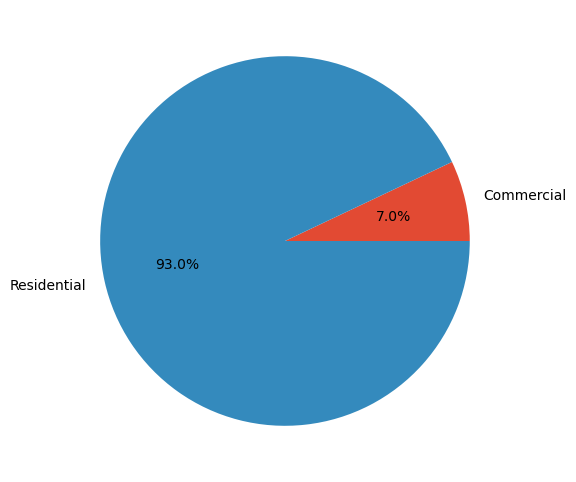

In [14]:
df.groupby(['Residential/Commercial'])['Residential/Commercial'].count().plot.pie(autopct='%1.1f%%',subplots=True)
plt.ylabel('')
plt.show()

From the piechart it can be seen that, the majority of the evictions corresponds to residential buildings with a percentage of 93%. One potential reason is that residential tenants may struggle to pay rent due to financial difficulties or job loss, which can lead to eviction if the landlord is not willing to work out a payment plan or make other accommodations. In contrast, commercial tenants may be companies and firms that have a better financial stability. 

The last information derived from our initial dataset is an interactive map of the 195 listed neighborhoods (NTAs) and with the occurences of evictions spanned over the years.

4th plot -> interactive maps of NTAs and evictions (last plot on video )

Analyzing the above, it was judged necessary to incorporate more information about the specified area that could justify or interpret the number of evictions in the examined years. Thus, we searched for economic, social, housing and demographic data of our area and we derived them from the American Community survey website. (dataource here)

### Housing Data

In [15]:
hous_17 = pd.read_excel('housing_data/hous_2017_acs5yr_nta.xlsx')
hous_18 = pd.read_excel('housing_data/hous_2018_acs5yr_nta.xlsx')
hous_19 = pd.read_excel('housing_data/hous_2019_acs5yr_nta.xlsx')
hous_20 = pd.read_excel('housing_data/hous_2020_acs5yr_nta.xlsx')
hous_21 = pd.read_excel('housing_data/hous_2021_acs5yr_nta.xlsx')

In [16]:
hous_17['year'] = 2017
hous_18['year'] = 2018
hous_19['year'] = 2019
hous_20['year'] = 2020
hous_21['year'] = 2021

In [17]:
hous17 = hous_17[['year','GeoName','MdGRE']]
hous18 = hous_18[['year','GeogName','MdGRE']]
hous19 = hous_19[['year','GeogName','MdGRE']]
hous20 = hous_20[['year','GeogName','MdGRE']]
hous21 = hous_21[['year','GeogName','MdGRE']]

In [18]:
housing_data = pd.concat([hous17, hous18, hous19, hous20, hous21], axis=0)

In [19]:
housing_data = housing_data.dropna(subset=['MdGRE'])
housing_data.head() 

,year,GeoName,MdGRE,GeogName
0,2017,Allerton-Pelham Gardens,1336.0,NaN
1,2017,Bedford Park-Fordham North,1208.0,NaN
2,2017,Belmont,1114.0,NaN
3,2017,Bronxdale,1117.0,NaN
4,2017,Claremont-Bathgate,822.0,NaN


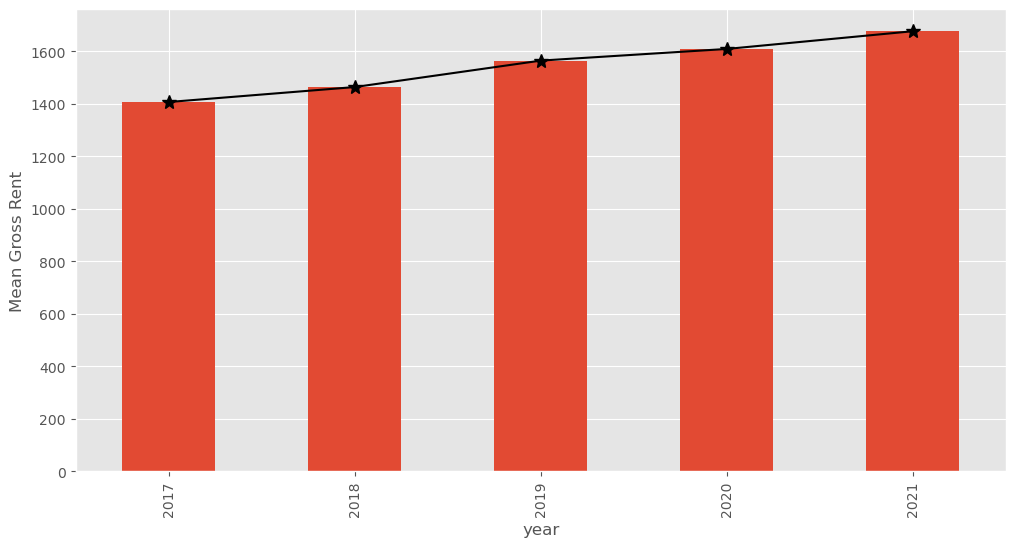

In [20]:
x_axis = [housing_data.groupby(['year'])['MdGRE'].mean().iloc[0], housing_data.groupby(['year'])['MdGRE'].mean().iloc[1], housing_data.groupby(['year'])['MdGRE'].mean().iloc[2], housing_data.groupby(['year'])['MdGRE'].mean().iloc[3], housing_data.groupby(['year'])['MdGRE'].mean().iloc[4]]
housing_data.groupby(['year'])['MdGRE'].mean().plot.bar(y='MdGRE', x='year')
plt.plot(x_axis, marker='*', color='black', ms=10)
plt.ylabel('Mean Gross Rent')
plt.xlabel('year')
plt.show()

The first thing someone has to search for in order to analyze evictions, is the respective Rent prices as well as the Household income spanned over the examined period. In this regard, we have plotted in the above figure the Mean Gross Rent over the years. It can be seen that Rent prices are steadily increasing over the years, something that does not come along with the decreasing occurences in evictions in the period. For this reason, the mean gross rent should be compared with the respective household income in order to better justify the results.

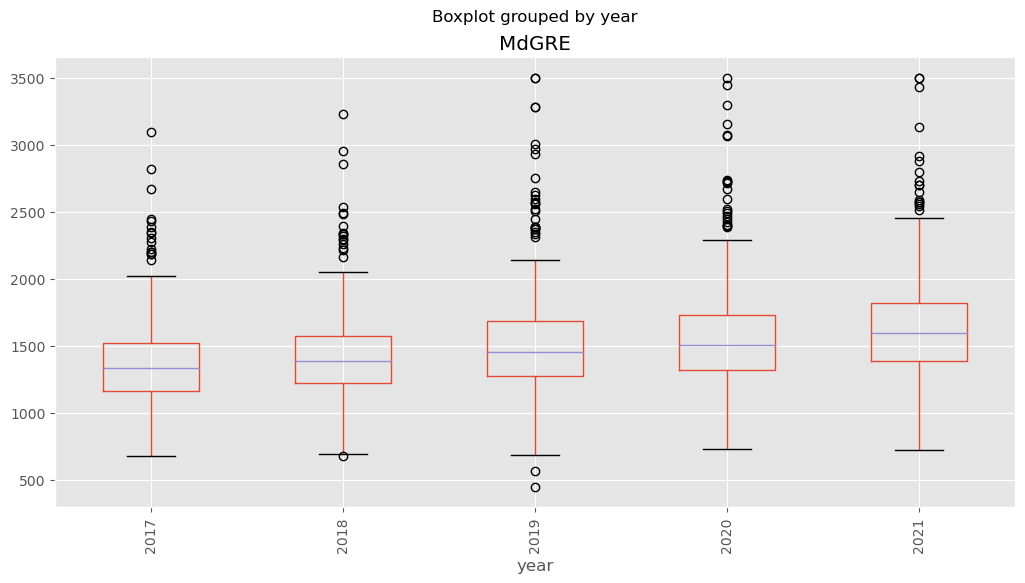

In [21]:
housing_data.boxplot(column=['MdGRE'], by='year')
plt.xticks(rotation=90);

### GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)

In [22]:
hous17_ratio = hous_17[['GRPIU15E' , 'GRPI15t19E' , 'GRPI20t24E' , 'GRPI25t29E' , 'GRPI30t34E' , 'GRPI35plE' , 'GRPI50plE']]
hous18_ratio = hous_18[['GRPIU15E' , 'GRPI15t19E' , 'GRPI20t24E' , 'GRPI25t29E' , 'GRPI30t34E' , 'GRPI35plE' , 'GRPI50plE']]
hous19_ratio = hous_19[['GRPIU15E' , 'GRPI15t19E' , 'GRPI20t24E' , 'GRPI25t29E' , 'GRPI30t34E' , 'GRPI35plE' , 'GRPI50plE']]
hous20_ratio = hous_20[['GRPIU15E' , 'GRPI15t19E' , 'GRPI20t24E' , 'GRPI25t29E' , 'GRPI30plE' , 'GRPI50plE']]
hous21_ratio = hous_21[['GRPIU15E' , 'GRPI15t19E' , 'GRPI20t24E' , 'GRPI25t29E' , 'GRPI30plE' , 'GRPI50plE']]
hous_ratio = [hous17_ratio, hous18_ratio, hous19_ratio, hous20_ratio, hous21_ratio]

In [23]:
# plt.figure(figsize=(20, 15))
# plt.subplots_adjust(wspace=0.3)
# plt.subplots_adjust(hspace=0.6)
# #hous_ratio = [hous17_ratio, hous18_ratio, hous19_ratio, hous20_ratio, hous21_ratio]
# title_year =['2017','2018','2019','2020','2021']

# for n, category in enumerate(hous_ratio):
#     ax = plt.subplot(2, 3, n + 1)
#     if n <= 2:
#         hous_ratio[n].sum().plot.bar(ax=ax)
#         ax.set_xticklabels(['<15%', '15%-19.9%', '20%-24.9%','25%-29.9%','30%-34.9%','>35%','>50%'], rotation=90)
#     else:
#         hous_ratio[n].sum().plot.bar(ax=ax)
#         ax.set_xticklabels(['<15%', '15%-19.9%', '20%-24.9%','25%-29.9%','>30%','>50%'], rotation=90)

#     ax.set_title(title_year[n])

Before analyzing the income, it was considered relevant to check also the percentage of the salary that people spend on their rent. At first, a subplot was visualized that contained the necessary information for each of the examined year. It was noticed though, that values were exactly the same for all the years, and thus the above plot illustartes only the year 2021. It can be seen that for the majority of the population, monthly rent accounts for more than 30% of an individual's monthly income, explaining why maybe some are refusing to pay their rent, leading to eviction incidents.

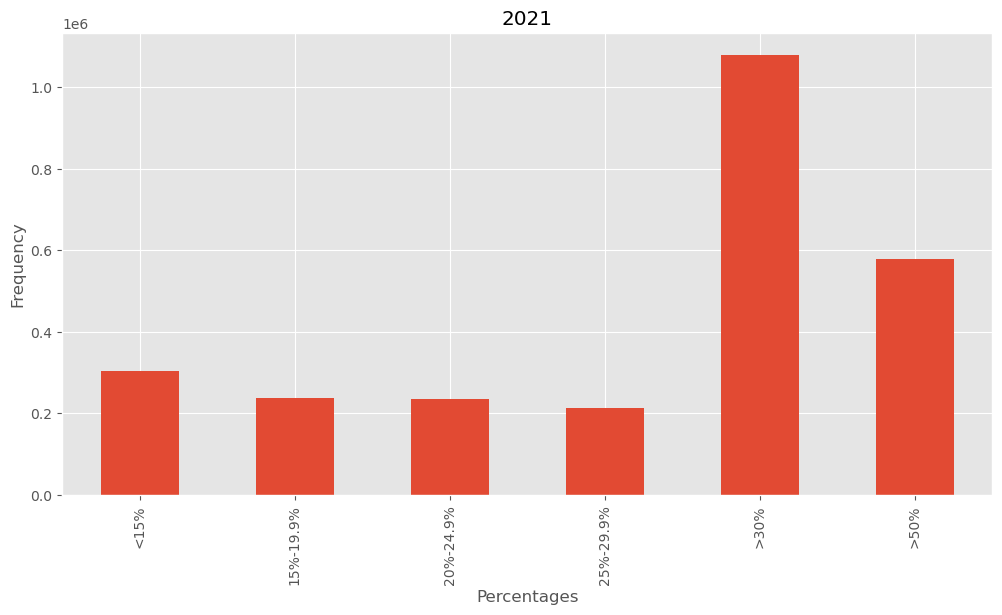

In [24]:
ax = plt.subplot()
hous21_ratio.sum().plot.bar()
ax.set_xticklabels(['<15%', '15%-19.9%', '20%-24.9%','25%-29.9%','>30%','>50%'], rotation=90)
ax.set_title('2021')
ax.set_ylabel('Frequency')
ax.set_xlabel('Percentages')
plt.show()

Before analyzing the income, it was considered relevant to check also the percentage of the salary that people spend on their rent. The above plot illustrates this information from 2017 to 2021. It can be seen that for all the years, monthly rent accounts for more than 30% of an individual's monthly income, explaining why maybe some are refusing to pay their rent, followed by evictions.

### Economic Data

In [25]:
econ_17 = pd.read_excel('economic_data/econ_2017_acs5yr_nta.xlsx')
econ_18 = pd.read_excel('economic_data/econ_2018_acs5yr_nta.xlsx')
econ_19 = pd.read_excel('economic_data/econ_2019_acs5yr_nta.xlsx')
econ_20 = pd.read_excel('economic_data/econ_2020_acs5yr_nta.xlsx')
econ_21 = pd.read_excel('economic_data/econ_2021_acs5yr_nta.xlsx')

In [26]:
econ_17['year'] = 2017
econ_18['year'] = 2018
econ_19['year'] = 2019
econ_20['year'] = 2020
econ_21['year'] = 2021

In [27]:
econ17 = econ_17[['year','GeoName','MnHHIncE']]
econ18 = econ_18[['year','GeogName','MnHHIncE']]
econ19 = econ_19[['year','GeoName','MnHHIncE']]
econ20 = econ_20[['year','GeoName','MnHHIncE']]
econ21 = econ_21[['year','GeogName','MnHHIncE']]

In [28]:
econ_21

,GeoType,NTAType,GeogName,GeoID,Borough,Pop16plE,Pop16plM,Pop16plC,Pop16plP,Pop16plZ,...,Pv400t499M,Pv400t499C,Pv400t499P,Pv400t499Z,Pv500plE,Pv500plM,Pv500plC,Pv500plP,Pv500plZ,year
0,NTA2020,0,Greenpoint,BK0101,Brooklyn,33164,1421.0,2.6,100.0,0.0,...,592.0,8.2,11.8,1.5,18983,1191.0,3.8,50.8,2.3,2021
1,NTA2020,0,Williamsburg,BK0102,Brooklyn,52924,2087.0,2.4,100.0,0.0,...,660.0,9.1,7.0,1.0,28922,1564.0,3.3,45.8,1.6,2021
2,NTA2020,0,South Williamsburg,BK0103,Brooklyn,24719,1651.0,4.1,100.0,0.0,...,477.0,17.8,3.5,1.0,3716,844.0,13.8,7.9,1.7,2021
3,NTA2020,0,East Williamsburg,BK0104,Brooklyn,45574,1817.0,2.4,100.0,0.0,...,885.0,10.9,9.3,1.6,15435,1058.0,4.2,28.9,1.5,2021
4,NTA2020,0,Brooklyn Heights,BK0201,Brooklyn,20952,1075.0,3.1,100.0,0.0,...,344.0,15.9,5.8,1.5,17619,1276.0,4.4,77.0,3.5,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,NTA2020,9,Freshkills Park (North),SI0291,Staten Island,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2021
258,NTA2020,9,Freshkills Park (South),SI0391,Staten Island,23,17.0,44.9,100.0,0.0,...,NaN,NaN,NaN,NaN,9,13.0,87.8,39.1,48.6,2021
259,NTA2020,9,Hoffman & Swinburne Islands,SI9591,Staten Island,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2021
260,NTA2020,9,Miller Field,SI9592,Staten Island,260,265.0,62.0,100.0,0.0,...,NaN,NaN,NaN,NaN,57,66.0,70.5,21.9,12.1,2021


In [29]:
economic_data = pd.concat([econ17, econ18, econ19, econ20, econ21], axis=0)
economic_data

,year,GeoName,MnHHIncE,GeogName
0,2017,Allerton-Pelham Gardens,81828.0,NaN
1,2017,Bedford Park-Fordham North,47583.0,NaN
2,2017,Belmont,37108.0,NaN
3,2017,Bronxdale,48953.0,NaN
4,2017,Claremont-Bathgate,35232.0,NaN
...,...,...,...,...
257,2021,NaN,NaN,Freshkills Park (North)
258,2021,NaN,NaN,Freshkills Park (South)
259,2021,NaN,NaN,Hoffman & Swinburne Islands
260,2021,NaN,124871.0,Miller Field


In [30]:
economic_data = economic_data.dropna(subset=['MnHHIncE'])
economic_data

,year,GeoName,MnHHIncE,GeogName
0,2017,Allerton-Pelham Gardens,81828.0,NaN
1,2017,Bedford Park-Fordham North,47583.0,NaN
2,2017,Belmont,37108.0,NaN
3,2017,Bronxdale,48953.0,NaN
4,2017,Claremont-Bathgate,35232.0,NaN
...,...,...,...,...
196,2021,NaN,130084.0,Tottenville-Charleston
199,2021,NaN,141223.0,Fort Hamilton
205,2021,NaN,86661.0,Fort Wadsworth
240,2021,NaN,20017.0,Pelham Bay Park


In [31]:
x_axisss = [economic_data.groupby(['year'])['MnHHIncE'].mean().iloc[0], economic_data.groupby(['year'])['MnHHIncE'].mean().iloc[1], economic_data.groupby(['year'])['MnHHIncE'].mean().iloc[2], economic_data.groupby(['year'])['MnHHIncE'].mean().iloc[3], economic_data.groupby(['year'])['MnHHIncE'].mean().iloc[4]]

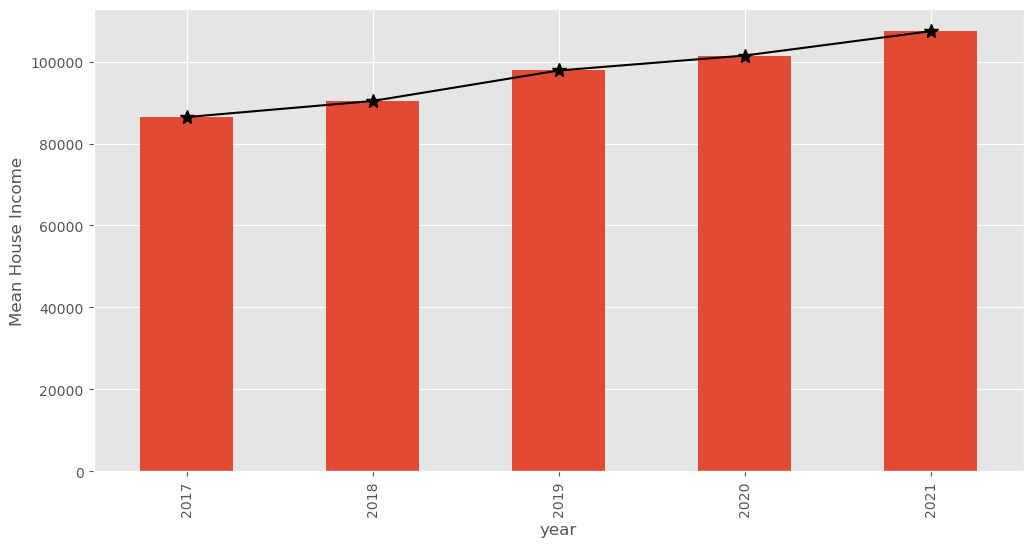

In [32]:
economic_data.groupby(['year'])['MnHHIncE'].mean().plot.bar(y='MnHHIncE', x='year')
plt.plot(x_axisss, marker='*', color='black', ms=10)
plt.ylabel('Mean House Income')
plt.show()

In our search for the annual household income, we found out that its mean value is increasing over the years. These findings come along with the rent prices that are increasing as well, and they also justify the decreasing occurences in evictions. A reasonable interpretation of the above two plots would be that since the income increases, the rent prices go up and thus a steady economic situation is retained with people paying their rent.

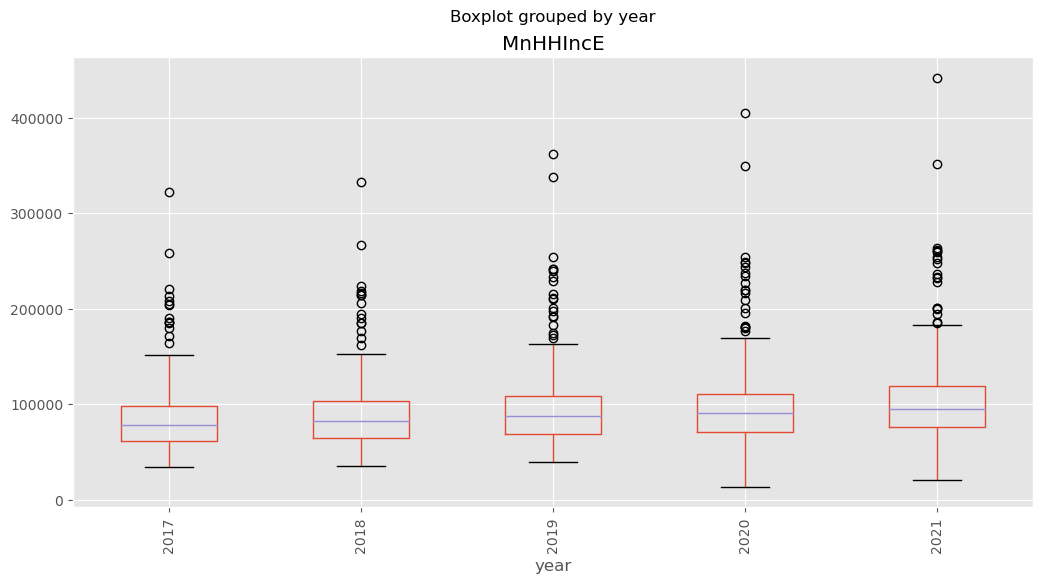

In [33]:
economic_data.boxplot(column=['MnHHIncE'], by='year')
plt.xticks(rotation=90);

In [34]:
econ_17_ind = econ_17.groupby("Borough")[['AgFFHME', 'ConstctnE','MnfctrngE','WhlsaleE','RetailE','TrWHUtE','InfoE','FIREE','PrfSMgAWME','EdHlthCSAE','ArtEnRAFSE','OthnotPAE','PubAdminE']].sum()
econ_17_ind.rename(columns = {'AgFFHME':'Agriculture', 'ConstctnE':'Construction', 'MnfctrngE':'Manufacturing', 'WhlsaleE':'Wholesale trade', 'RetailE':'Retail trade', 'TrWHUtE':'Transportation', 'InfoE':'Information', 'FIREE':'Finance and insurance','PrfSMgAWME':'Scientific, management','EdHlthCSAE':'Educational services','ArtEnRAFSE':'Arts and entertainment','OthnotPAE':'Other services','PubAdminE':'Public administration'}, inplace = True)

econ_18_ind = econ_18.groupby("Borough")[['AgFFHME', 'ConstctnE','MnfctrngE','WhlsaleE','RetailE','TrWHUtE','InfoE','FIREE','PrfSMgAWME','EdHlthCSAE','ArtEnRAFSE','OthnotPAE','PubAdminE']].sum()
econ_18_ind.rename(columns = {'AgFFHME':'Agriculture', 'ConstctnE':'Construction', 'MnfctrngE':'Manufacturing', 'WhlsaleE':'Wholesale trade', 'RetailE':'Retail trade', 'TrWHUtE':'Transportation', 'InfoE':'Information', 'FIREE':'Finance and insurance','PrfSMgAWME':'Scientific, management','EdHlthCSAE':'Educational services','ArtEnRAFSE':'Arts and entertainment','OthnotPAE':'Other services','PubAdminE':'Public administration'}, inplace = True)

econ_19_ind = econ_19.groupby("Borough")[['AgFFHME', 'ConstctnE','MnfctrngE','WhlsaleE','RetailE','TrWHUtE','InfoE','FIREE','PrfSMgAWME','EdHlthCSAE','ArtEnRAFSE','OthnotPAE','PubAdminE']].sum()
econ_19_ind.rename(columns = {'AgFFHME':'Agriculture', 'ConstctnE':'Construction', 'MnfctrngE':'Manufacturing', 'WhlsaleE':'Wholesale trade', 'RetailE':'Retail trade', 'TrWHUtE':'Transportation', 'InfoE':'Information', 'FIREE':'Finance and insurance','PrfSMgAWME':'Scientific, management','EdHlthCSAE':'Educational services','ArtEnRAFSE':'Arts and entertainment','OthnotPAE':'Other services','PubAdminE':'Public administration'}, inplace = True)

econ_20_ind = econ_20.groupby("Borough")[['AgFFHME', 'ConstctnE','MnfctrngE','WhlsaleE','RetailE','TrWHUtE','InfoE','FIREE','PrfSMgAWME','EdHlthCSAE','ArtEnRAFSE','OthnotPAE','PubAdminE']].sum()
econ_20_ind.rename(columns = {'AgFFHME':'Agriculture', 'ConstctnE':'Construction', 'MnfctrngE':'Manufacturing', 'WhlsaleE':'Wholesale trade', 'RetailE':'Retail trade', 'TrWHUtE':'Transportation', 'InfoE':'Information', 'FIREE':'Finance and insurance','PrfSMgAWME':'Scientific, management','EdHlthCSAE':'Educational services','ArtEnRAFSE':'Arts and entertainment','OthnotPAE':'Other services','PubAdminE':'Public administration'}, inplace = True)

econ_21_ind = econ_21.groupby("Borough")[['AgFFHME', 'ConstctnE','MnfctrngE','WhlsaleE','RetailE','TrWHUtE','InfoE','FIREE','PrfSMgAWME','EdHlthCSAE','ArtEnRAFSE','OthnotPAE','PubAdminE','CvLFUEm1E']].sum()
econ_21_ind.rename(columns = {'AgFFHME':'Agriculture', 'ConstctnE':'Construction', 'MnfctrngE':'Manufacturing', 'WhlsaleE':'Wholesale trade', 'RetailE':'Retail trade', 'TrWHUtE':'Transportation', 'InfoE':'Information', 'FIREE':'Finance and insurance','PrfSMgAWME':'Scientific, management','EdHlthCSAE':'Educational services','ArtEnRAFSE':'Arts and entertainment','OthnotPAE':'Other services','PubAdminE':'Public administration'}, inplace = True)

econ_industry_all = [econ_17_ind, econ_18_ind, econ_19_ind, econ_20_ind, econ_21_ind]

In [35]:
econ_21_ind['sum']= econ_20_ind.sum(axis=1)

In [40]:
df_norm = econ_21_ind.div(econ_21_ind['sum'], axis=0)
df_norm = df_norm.drop(['sum', 'CvLFUEm1E'], axis=1)

In [41]:
df_norm

,Agriculture,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation,Information,Finance and insurance,"Scientific, management",Educational services,Arts and entertainment,Other services,Public administration
Borough,,,,,,,,,,,,,
Bronx,0.001583,0.051967,0.031407,0.016612,0.103923,0.083014,0.015309,0.063784,0.097841,0.345023,0.108897,0.053185,0.039023
Brooklyn,0.000864,0.051673,0.031119,0.021477,0.093231,0.071264,0.050574,0.079104,0.153319,0.302729,0.097840,0.050755,0.041010
Manhattan,0.000810,0.019653,0.029595,0.017614,0.069085,0.028536,0.059712,0.164204,0.211511,0.244806,0.095551,0.042637,0.028924
Queens,0.000896,0.077690,0.034697,0.020351,0.097691,0.088225,0.026523,0.079456,0.123199,0.270285,0.110977,0.063897,0.045788
Staten Island,0.001334,0.076291,0.023500,0.018624,0.092606,0.079092,0.024494,0.090992,0.119515,0.326898,0.071070,0.041508,0.066586


In [ ]:
# plt.figure(figsize=(20, 15))
# plt.subplots_adjust(wspace=0.8)
# plt.subplots_adjust(hspace=0.4)
# title_year =['2017','2018','2019','2020','2021']

# for n, category in enumerate(econ_industry_all):
#     ax = plt.subplot(2, 3, n + 1)
#     econ_industry_all[n].plot.bar(ax=ax)
#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
#     ax.set_title(title_year[n])

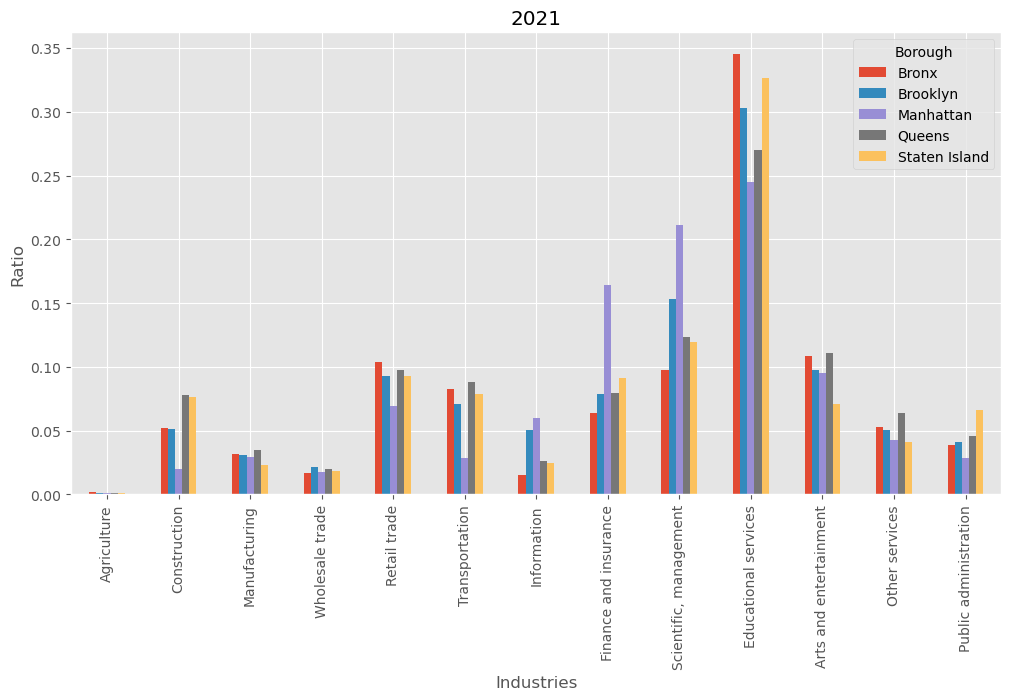

In [57]:
df_norm.T.plot.bar()
plt.xlabel('Industries')
plt.ylabel('Ratio')
plt.title('2021')
plt.show()

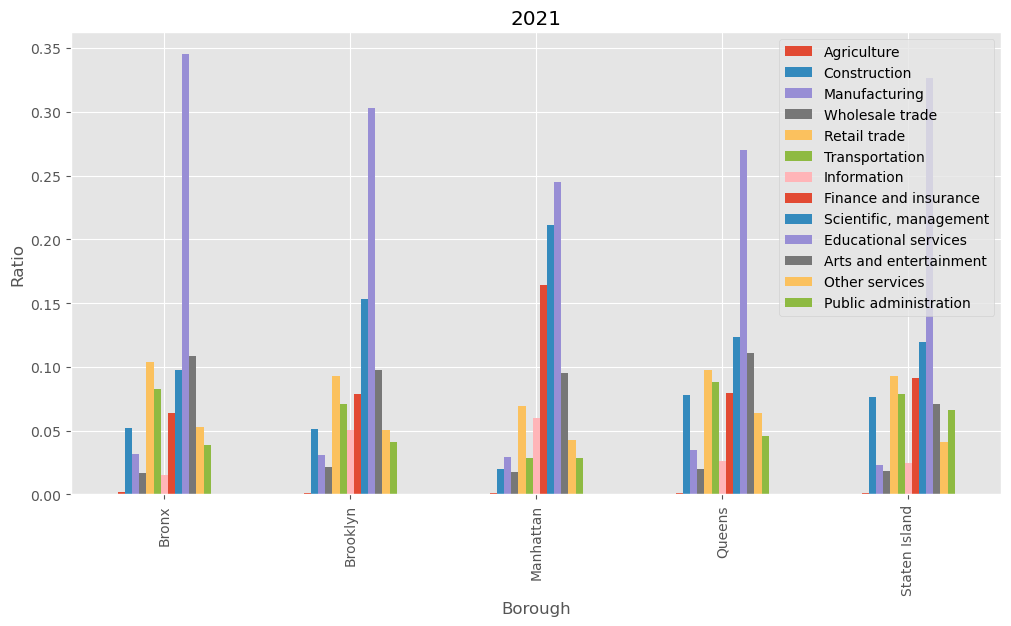

In [58]:
df_norm.plot.bar()
plt.xlabel('Borough')
plt.ylabel('Ratio')
plt.title('2021')
plt.show()

Another instersting aspect that can enrich our research on evictions, is the distribution of diferrent professions among the civilian labor force of the city. Thus, we created the above plot that distinguishes the ratio of professions compared to the total population of each borough. It can be seen that Educational services (healthcare, social) is the field in which most people are employed with Bronx standing out with the highest ratio. Moreover, it is clear that Manhattan possesses the highest ratio in Finance and insurance recognized as a financial district worldwide while scientific and management fields are also dominating in Manhattan. Comparing the above with the eviction occurrences among the Boroughs, it can be inferred that the low ratio of evictions in Manhattan can be linked to the fact that a lot of people in this Borough are working in finance which is a highly paid field. 

### EMPLOYMENT STATUS

In [44]:
Unemployed_ratio_2017 = econ_17['CvLFUEm1E'].sum() / econ_17['CvLF1E'].sum()
Unemployed_ratio_2018 = econ_18['CvLFUEm1E'].sum() / econ_18['CvLF1E'].sum()
Unemployed_ratio_2019 = econ_19['CvLFUEm1E'].sum() / econ_19['CvLF1E'].sum()
Unemployed_ratio_2020 = econ_20['CvLFUEm1E'].sum() / econ_20['CvLF1E'].sum()
Unemployed_ratio_2021 = econ_21['CvLFUEm1E'].sum() / econ_21['CvLF1E'].sum()
Unemployed_ratio = [Unemployed_ratio_2017*100, Unemployed_ratio_2018*100, Unemployed_ratio_2019*100, Unemployed_ratio_2020*100, Unemployed_ratio_2021*100]

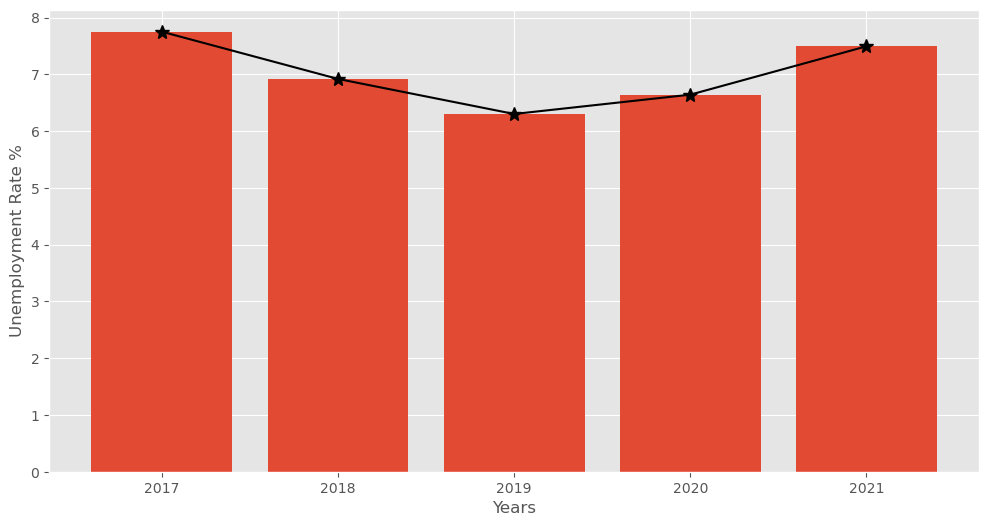

In [46]:
title_year =['2017','2018','2019','2020','2021']
plt.bar(title_year, Unemployed_ratio)
plt.plot(Unemployed_ratio, marker='*', color='black', ms=10)
plt.xlabel('Years')
plt.ylabel('Unemployment Rate %')
plt.show()

At this point, it makes sense to relate eviction incidents with the unemployment status of the city. In particular, from the supplementary dataset, the total unemployment percentage rate was calculated and plotted against the examined period. It is evident that unemployment in the city of New York is decreasing until 2019, while the outburst of COVID-19 in 2020 boosts the rates. The decrease in unemployment also justifies the downward trend of the evictions in the respective years.

### Demographic Data

In [47]:
dem2017 = pd.read_excel('demographic_data\demo_2017_acs5yr_nta.xlsx')
dem2018 = pd.read_excel('demographic_data\demo_2018_acs5yr_nta.xlsx')
dem2019 = pd.read_excel('demographic_data\demo_2019_acs5yr_nta.xlsx')
dem2020 = pd.read_excel('demographic_data\demo_2020_acs5yr_nta.xlsx')
dem2021 = pd.read_excel('demographic_data\demo_2021_acs5yr_nta.xlsx')

In [48]:
dem_2017 = dem2017[["Hsp1E", "WtNHE", "BlNHE", "AIANNHE", "AsnNHE", "NHPINHE", "OthNHE", "Rc2plNHE"]]
dem_2018 = dem2018[["Hsp1E", "WtNHE", "BlNHE", "AIANNHE", "AsnNHE", "NHPINHE", "OthNHE", "Rc2plNHE"]]
dem_2019 = dem2019[["Hsp1E", "WtNHE", "BlNHE", "AIANNHE", "AsnNHE", "NHPINHE", "OthNHE", "Rc2plNHE"]]
dem_2020 = dem2020[["Hsp1E", "WtNHE", "BlNHE", "AIANNHE", "AsnNHE", "NHPINHE", "OthNHE", "Rc2plNHE"]]
dem_2021 = dem2021[["Hsp1E", "WtNHE", "BlNHE", "AIANNHE", "AsnNHE", "NHPINHE", "OthNHE", "Rc2plNHE"]]
demo_all = [dem_2017, dem_2018, dem_2019, dem_2020, dem_2021]

In [49]:
# plt.figure(figsize=(20, 15))
# plt.subplots_adjust(wspace=0.3)
# plt.subplots_adjust(hspace=0.6)
# title_year =['2017','2018','2019','2020','2021']

# for n, category in enumerate(demo_all):
#     ax = plt.subplot(2, 3, n + 1)
#     demo_all[n].sum().plot.bar(ax=ax)
#     ax.set_xticklabels(['Latino', 'White alone','Black alone','American Indian','Asian alone','Pacific Islander alone','Other race','Two or more races'], rotation=90)

#     ax.set_title(title_year[n])

Since evictions is a highly controversial phenomenon with many people in favor and against it, we want to check whether there is any correlation with targeted ethnicity groups. For this reason, we retrived information about ethnicity groups in the boroughs of New York and tried to relate it with the corresponding eviction occurrences in these areas.

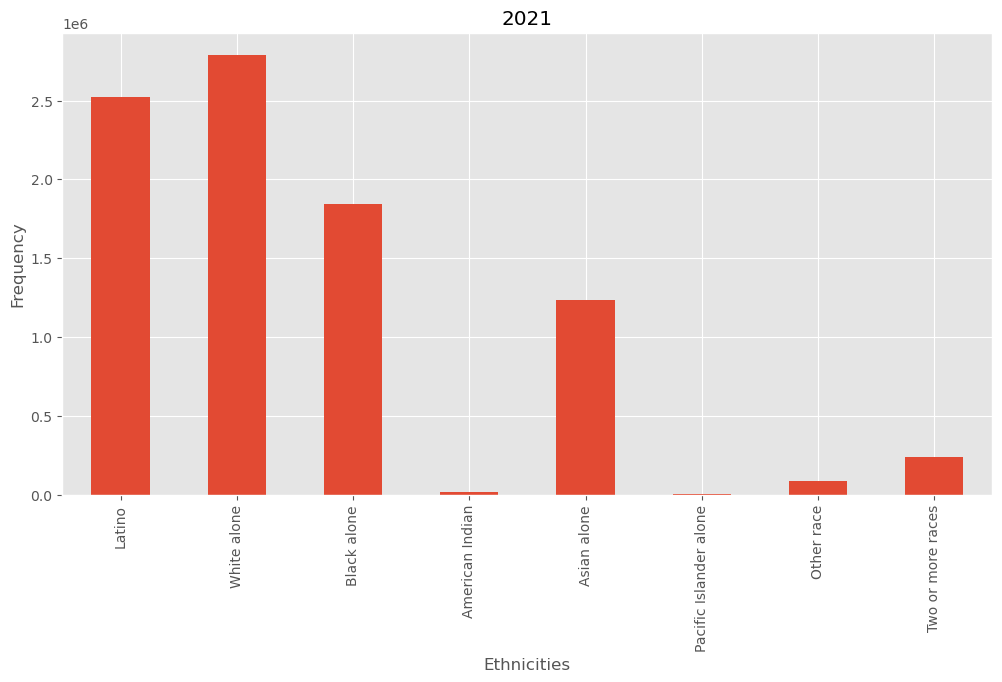

In [50]:
ax = plt.subplot()
dem_2021.sum().plot.bar()
ax.set_xticklabels(['Latino', 'White alone','Black alone','American Indian','Asian alone','Pacific Islander alone','Other race','Two or more races'], rotation=90)
ax.set_title('2021')
ax.set_ylabel('Frequency')
ax.set_xlabel('Ethnicities')
plt.show()

In the above plot, you can see the distribution of ethnicities in the city of New York. It looks like the majority of the population is White people, Latino and then followed by Black people.

In [51]:
dem_2017_borough = dem2017.groupby("Borough")[["Hsp1E", "WtNHE", "BlNHE", "AIANNHE", "AsnNHE", "NHPINHE", "OthNHE", "Rc2plNHE"]].sum()
dem_2017_borough.rename(columns = {'Hsp1E':'Latino', 'WtNHE':'White', 'BlNHE':'Black', 'AIANNHE':'American Indian', 'AsnNHE':'Asian alone', 'NHPINHE':'Pacific Islander alone', 'OthNHE':'Other race', 'Rc2plNHE':'Two or more races'}, inplace = True)

dem_2018_borough = dem2018.groupby("Borough")[["Hsp1E", "WtNHE", "BlNHE", "AIANNHE", "AsnNHE", "NHPINHE", "OthNHE", "Rc2plNHE"]].sum()
dem_2018_borough.rename(columns = {'Hsp1E':'Latino',  'WtNHE':'White', 'BlNHE':'Black', 'AIANNHE':'American Indian', 'AsnNHE':'Asian alone', 'NHPINHE':'Pacific Islander alone', 'OthNHE':'Other race', 'Rc2plNHE':'Two or more races'}, inplace = True)


dem_2019_borough = dem2019.groupby("Borough")[["Hsp1E", "WtNHE", "BlNHE", "AIANNHE", "AsnNHE", "NHPINHE", "OthNHE", "Rc2plNHE"]].sum()
dem_2019_borough.rename(columns = {'Hsp1E':'Latino', 'WtNHE':'White', 'BlNHE':'Black', 'AIANNHE':'American Indian', 'AsnNHE':'Asian alone', 'NHPINHE':'Pacific Islander alone', 'OthNHE':'Other race', 'Rc2plNHE':'Two or more races'}, inplace = True)


dem_2020_borough = dem2020.groupby("Borough")[["Hsp1E", "WtNHE", "BlNHE", "AIANNHE", "AsnNHE", "NHPINHE", "OthNHE", "Rc2plNHE"]].sum()
dem_2020_borough.rename(columns = {'Hsp1E':'Latino', 'WtNHE':'White', 'BlNHE':'Black', 'AIANNHE':'American Indian', 'AsnNHE':'Asian alone', 'NHPINHE':'Pacific Islander alone', 'OthNHE':'Other race', 'Rc2plNHE':'Two or more races'}, inplace = True)


dem_2021_borough = dem2021.groupby("Borough")[["Hsp1E", "WtNHE", "BlNHE", "AIANNHE", "AsnNHE", "NHPINHE", "OthNHE", "Rc2plNHE"]].sum()
dem_2021_borough.rename(columns = {'Hsp1E':'Latino', 'WtNHE':'White', 'BlNHE':'Black', 'AIANNHE':'American Indian', 'AsnNHE':'Asian alone', 'NHPINHE':'Pacific Islander alone', 'OthNHE':'Other race', 'Rc2plNHE':'Two or more races'}, inplace = True)

dem_borough_all = [dem_2017_borough, dem_2018_borough, dem_2019_borough, dem_2020_borough, dem_2021_borough]

### By Borough

In [52]:
# plt.figure(figsize=(20, 15))
# plt.subplots_adjust(wspace=0.8)
# plt.subplots_adjust(hspace=0.4)
# title_year =['2017','2018','2019','2020','2021']

# for n, category in enumerate(dem_borough_all):
#     ax = plt.subplot(2, 3, n + 1)
#     dem_borough_all[n].plot.bar(ax=ax)
#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
#     ax.set_title(title_year[n])

In [59]:
dem_2021_borough

,Latino,White,Black,American Indian,Asian alone,Pacific Islander alone,Other race,Two or more races
Borough,,,,,,,,
Bronx,830899,131353,416897,3414,54013,312,13113,23353
Brooklyn,509527,996334,776581,3368,318686,1136,17855,88873
Manhattan,419394,779308,200613,1595,197464,374,10353,48273
Queens,670245,589213,405393,6461,612588,767,47406,67692
Staten Island,90957,294138,44849,672,51101,0,1052,10425


In [60]:
dem_2021_borough['sum']= dem_2021_borough.sum(axis=1)
dem_2021_borough

,Latino,White,Black,American Indian,Asian alone,Pacific Islander alone,Other race,Two or more races,sum
Borough,,,,,,,,,
Bronx,830899,131353,416897,3414,54013,312,13113,23353,1473354
Brooklyn,509527,996334,776581,3368,318686,1136,17855,88873,2712360
Manhattan,419394,779308,200613,1595,197464,374,10353,48273,1657374
Queens,670245,589213,405393,6461,612588,767,47406,67692,2399765
Staten Island,90957,294138,44849,672,51101,0,1052,10425,493194


In [61]:
df_norm_rat = dem_2021_borough.div(dem_2021_borough['sum'], axis=0)
df_norm_rat = df_norm_rat.drop(['sum'], axis=1)

In [62]:
df_norm_rat

,Latino,White,Black,American Indian,Asian alone,Pacific Islander alone,Other race,Two or more races
Borough,,,,,,,,
Bronx,0.563951,0.089152,0.282958,0.002317,0.036660,0.000212,0.008900,0.015850
Brooklyn,0.187854,0.367331,0.286312,0.001242,0.117494,0.000419,0.006583,0.032766
Manhattan,0.253047,0.470206,0.121043,0.000962,0.119143,0.000226,0.006247,0.029126
Queens,0.279296,0.245529,0.168930,0.002692,0.255270,0.000320,0.019754,0.028208
Staten Island,0.184424,0.596394,0.090936,0.001363,0.103612,0.000000,0.002133,0.021138


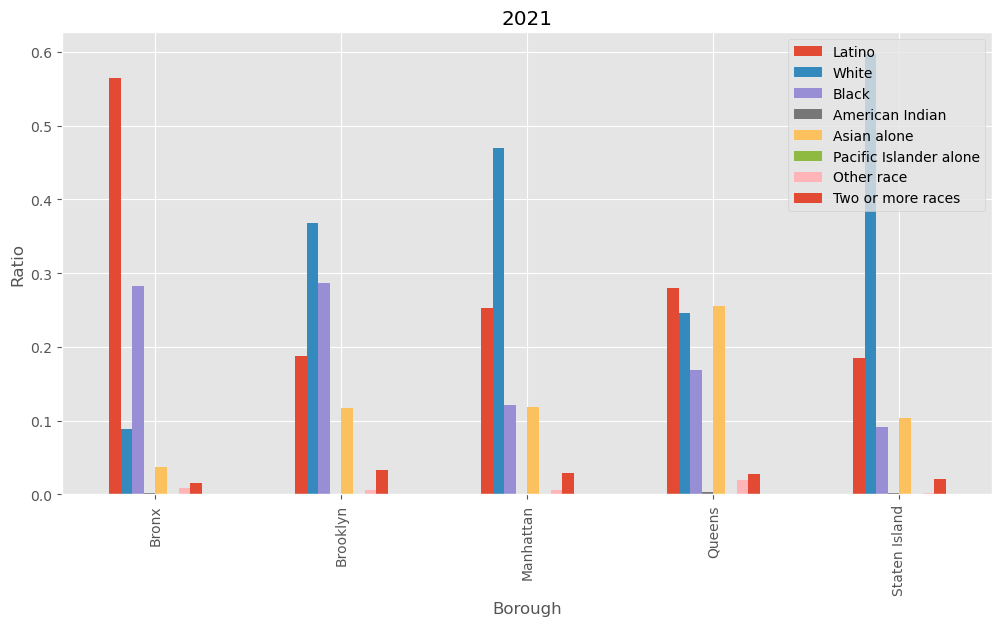

In [63]:
df_norm_rat.plot.bar()
plt.ylabel('Ratio')
plt.title('2021')
plt.show()

Based on the above plot, we observe the Bronx Borough is comprised mostly of Latinos and African Americans while White people form the minority of the borough. In contrast, Brooklyn is more or less, evenly distributed among White, Black and Latino ethnicities. Finally, Asian people seem to mostly reside in Queens, while is is evident that Staten Island Borough is mostly comprised of white ethnicities. Trying to correlate ethnicity groups with evictions, it can be noticed that the Bronx borough that has the highest number of evictions, is comprised of Latino and Black people. However, in order to be able to have a clearer and correct assumption on this, more investegation had to follow.

In [54]:
dem_borough_total_pop = [dem2017.groupby("Borough")['Pop_1E'].sum(), dem2018.groupby("Borough")['Pop_1E'].sum(), dem2019.groupby("Borough")['Pop_1E'].sum(), dem2020.groupby("Borough")['Pop_1E'].sum(), dem2021.groupby("Borough")['Pop_1E'].sum()]

In [55]:
# plt.figure(figsize=(20, 15))
# plt.subplots_adjust(wspace=0.8)
# plt.subplots_adjust(hspace=0.4)
# title_year =['2017','2018','2019','2020','2021']

# for n, category in enumerate(dem_borough_total_pop):
#     ax = plt.subplot(2, 3, n + 1)
#     dem_borough_total_pop[n].plot.bar(ax=ax)
#     # Put a legend to the right of the current axis
#     #ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
#     ax.set_title(title_year[n])

From our initial dataset, we identified tha Bronx is the borough with the most evictions. However, in order to be able to better intrepret that information, we decided to plot the respective populations on all the Boroughs. As you can see in the below plot, Brooklyn and Queens are the most populated boroughs while Bronx comes in 4th place. From this results, it makes sense to focus on the Bronx districts and its "characteristics" since the eviction cases are not proportional to the population.

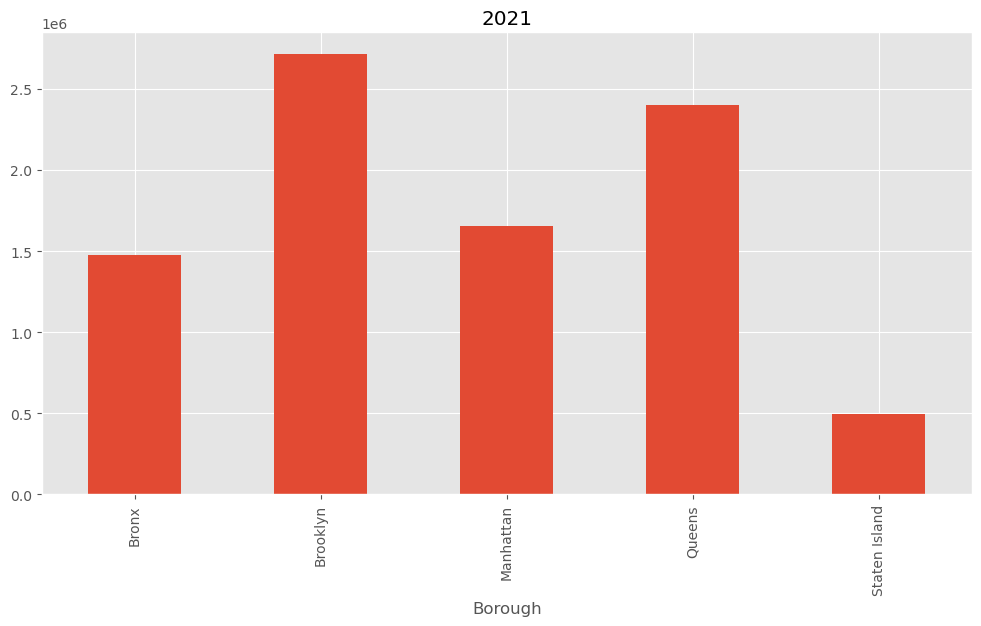

In [56]:
dem2021.groupby("Borough")['Pop_1E'].sum().plot.bar()
plt.title('2021')
plt.show()